# Convolution 연산의 결과

In [1]:
# 필요한 module import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

<class 'numpy.ndarray'> (429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'> (1, 427, 638, 1)


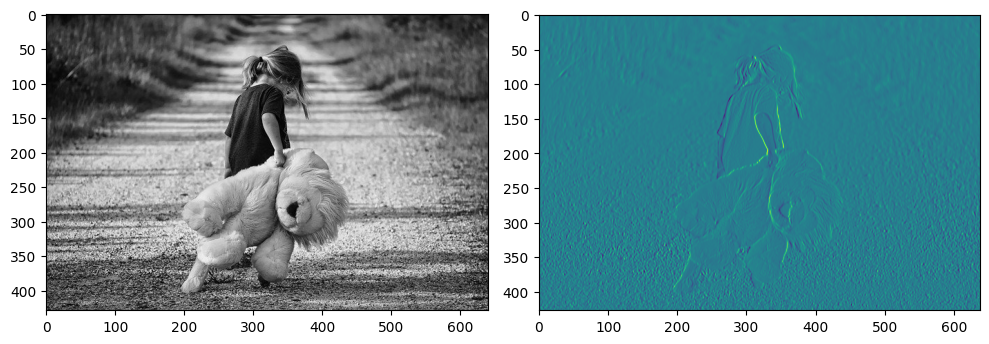

In [9]:
# 원본 이미지 준비

fig = plt.figure(figsize=(10,10))  # 그림을 그릴 영역을 준비해요!!

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ori_image = img.imread('/content/drive/MyDrive/KOSA3/data/image/girl_teddy.jpeg')
print(type(ori_image), ori_image.shape)  # <class 'numpy.ndarray'>, (429, 640, 3)
ax1.imshow(ori_image)

# 이 원본이미지에 대해 합성곱연산(convolution)을 수행

# tensorflow API를 이용해서 convolution 연산을 수행할건데..
# 이 API는 입력으로 4차원 데이터를 받아요!
# (이미지개수, height, width, color)  => (1, 429, 640, 3)
# 그러면 우리가 가지고 있는 데이터의 차원을 1차원 높여야 해요!

input_image = ori_image.reshape((1,) + ori_image.shape)
input_image = input_image.astype(np.float32)
print(input_image.shape) # (1, 429, 640, 3)

# 간단하게 처리해보기 위해 1채널로 이미지를 변경해 보아요!
channel_1_input_image = input_image[:,:,:,0:1]
print(channel_1_input_image.shape) # (1, 429, 640, 1)

# 이미지가 준비되었으니..이제 Filter를 준비해 보아요!
# 필터는 다음과 같은 형태로 준비해야 해요!
# (3,3,1,1) 이렇게 만들꺼예요!
# (filter height, filter width, filter channel, filter의 개수)
filter = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print(filter.shape)  # (3, 3, 1, 1)

# strides=1(가로,세로 1칸씩 이동)
# padding = 'SAME' (zero padding을 수행 하세요!!) => 크기가 변하지 않아요!
#         = 'VALID' (padding처리 하지 마세요!!) => 크기가 줄어들어요!

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')


# 이렇게 처리하면 되요! 그런데 이렇게 처리하면 tensorflow 객체가 결과로 나와요!
# 따라서 numpy로 변환해주는 작업이 필요
print(type(conv2d))  # <class 'tensorflow.python.framework.ops.EagerTensor'>
conv2d_result = conv2d.numpy()
print(type(conv2d_result), conv2d_result.shape)  # <class 'numpy.ndarray'>
# (1, 427, 638, 1)


t_img = conv2d_result[0,:,:,:]
ax2.imshow(t_img)

fig.tight_layout()
plt.show()

In [10]:
# CNN 구조에 대해서 이해했으면 이제
# 코드로 어떻게 구현하는지 Keras를 이용해서 알아보아요!

# 필요한 module import
# MNIST Data를 이용해서 처리할꺼예요.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/KOSA3/data/mnist/train.csv')
# display(df.head(), df.shape) # (42000, 785)

In [12]:
# Data Preprocessing(데이터 전처리)

# 1. 결측치처리
(((df.drop('label', axis=1, inplace=False)).isnull()).sum()).sum()
#   현재 데이터에는 결측치가 존재하지 않아요!

# 2. 이상치처리
#    현재 데이터에는 이상치도 존재하지 않아요!

# 3. 정규화처리
scaler = MinMaxScaler()
scaler.fit(df.drop('label', axis=1, inplace=False).values)
x_data_norm = scaler.transform(df.drop('label', axis=1, inplace=False).values)
t_data = df['label'].values.reshape(-1,1)

# 4. 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3)

In [13]:
# Keras Model 구현

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1, 1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1, 1),
                 activation='relu'))

model.add(Flatten())

model.add(Dense(units=256,
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 전체이미지수는 42,000
# 학습이미지수는 29,400
# 학습이미지를 한방에 모두 다 읽어와서 처리할 수 도 있지만
# 이런경우 메모리가 부족할수 있어요! 그래서 batch로 짤라서 읽어들여서 처리해야 해요!

model_result = model.fit(x_data_train_norm.reshape(-1,28,28,1),
                         t_data_train,
                         epochs=200,
                         batch_size=100,
                         verbose=1,
                         validation_split=0.3
                         )

Epoch 1/200
206/206 [==============================] - 26s 117ms/step - loss: 0.3360 - accuracy: 0.8976 - val_loss: 0.0972 - val_accuracy: 0.9720
Epoch 2/200
206/206 [==============================] - 20s 95ms/step - loss: 0.0783 - accuracy: 0.9751 - val_loss: 0.0581 - val_accuracy: 0.9808
Epoch 3/200
206/206 [==============================] - 23s 113ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0477 - val_accuracy: 0.9858
Epoch 4/200
206/206 [==============================] - 21s 101ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0504 - val_accuracy: 0.9845
Epoch 5/200
206/206 [==============================] - 23s 110ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0484 - val_accuracy: 0.9858
Epoch 6/200
206/206 [==============================] - 20s 97ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0460 - val_accuracy: 0.9854
Epoch 7/200
206/206 [==============================] - 24s 118ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0490 - v

In [ ]:
# model_result  # History라는 객체군요!
# print(model_result.history)  # python dictionary
# print(model_result.history.keys())
# 각 epoch당 loss, accuracy, val_loss, val_accuracy가 들어있어요!
plt.plot(model_result.history['loss'], color='r')
# 상식적으로 loss는 training data로 학습하고 training data로 평가했을때 loss값을 의미
# 당연히 epoch이 증가하면 loss값은 떨어지는게 정상이예요!
# accuracy는 training data로 학습하고 training data로 평가한 accuracy값이예요!
# 당연히 epoch이 증가하면 accuracy값은 증가하는게 정상이예요!
plt.plot(model_result.history['val_loss'], color='b')
plt.show()

In [ ]:
plt.plot(model_result.history['accuracy'], color='r')
plt.plot(model_result.history['val_accuracy'], color='b')
plt.show()

In [ ]:
# 우리 모델을 평가해 보아요! => evaluation

print(model.evaluate(x_data_test_norm.reshape(-1,28,28,1),
                     t_data_test))
# [0.09843821078538895, 0.9898412823677063]